In [111]:
import numpy as np

In [112]:
np_path_XYs = np.genfromtxt(r"./problems/isolated.csv",delimiter = ',')


In [113]:
size = len(np.unique(np_path_XYs[:,0]))
size

3

In [114]:
np_path_XYs[:,0] == 0

array([ True,  True,  True, ..., False, False, False])

In [115]:
np_XYs = np_path_XYs[np_path_XYs[:,0] == 0][:,1:]

In [116]:
np.unique(np_XYs[:,0])

array([0.])

In [117]:
XY =[]
XY2 =[]

In [118]:
for i in range(size):
    new_path = np_path_XYs[np_path_XYs[:,0] == i][:,2:]
    XY.append(new_path)

In [119]:
import matplotlib.pyplot as plt

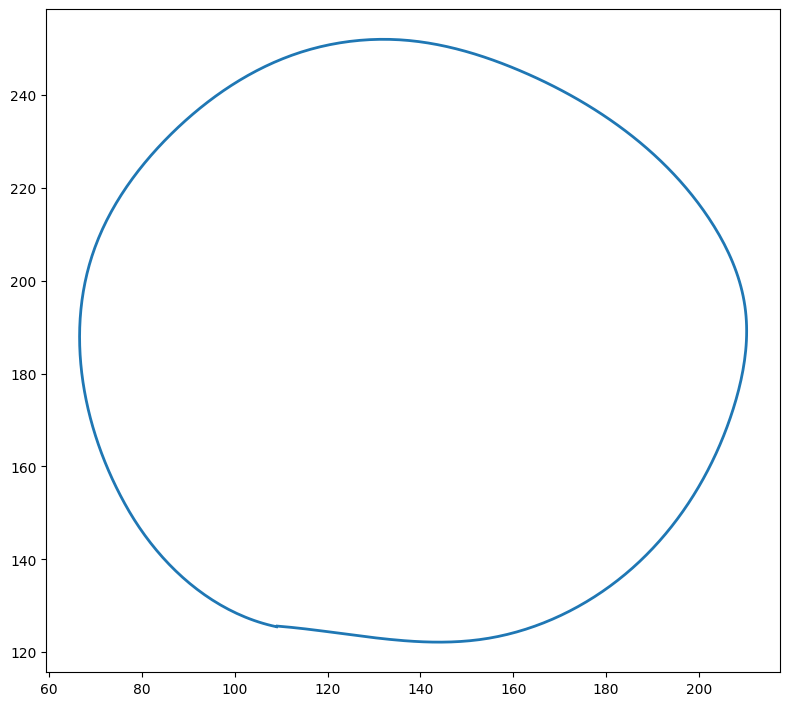

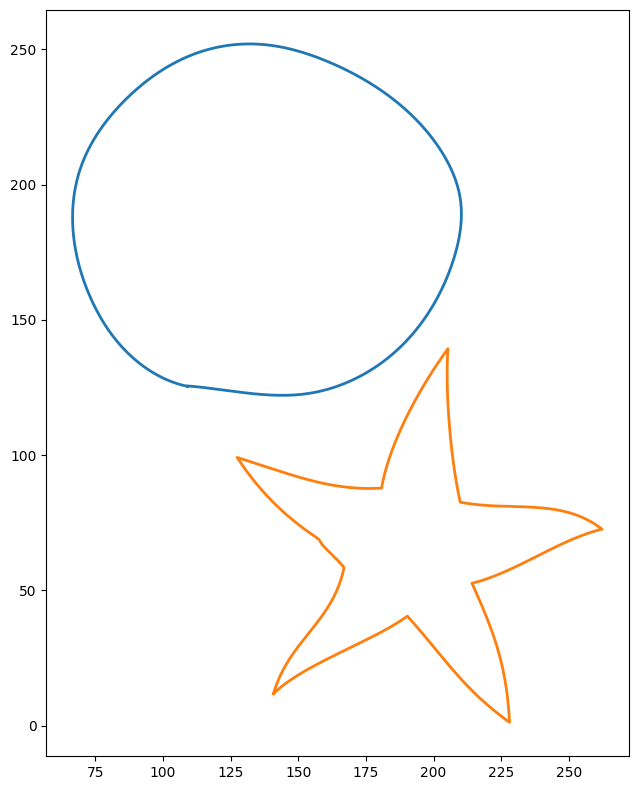

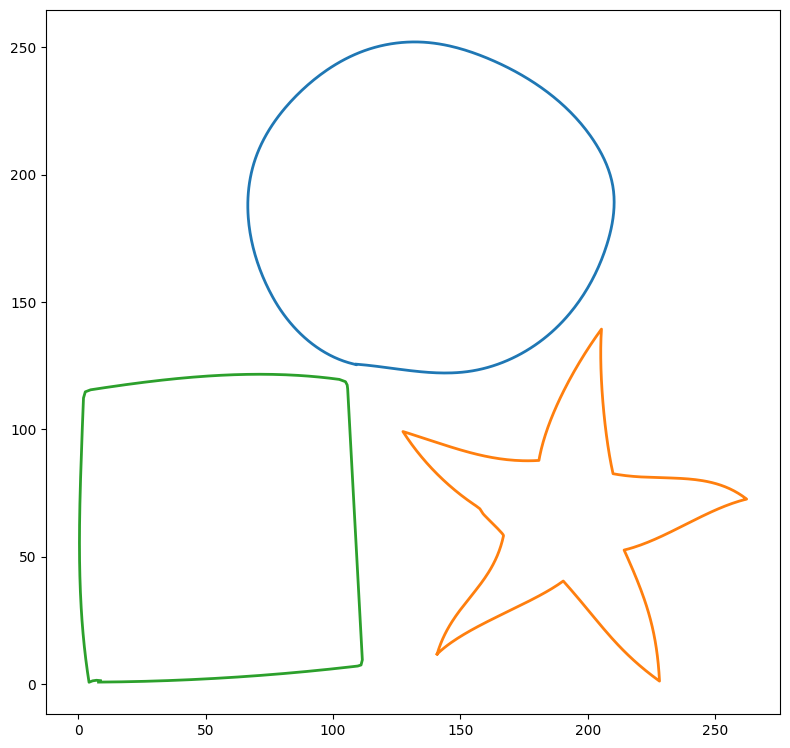

In [120]:
for i in range(size):
    fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
    for j in range(i+1):
        ax.plot (XY[j][:, 0], XY[j][:, 1], linewidth =2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


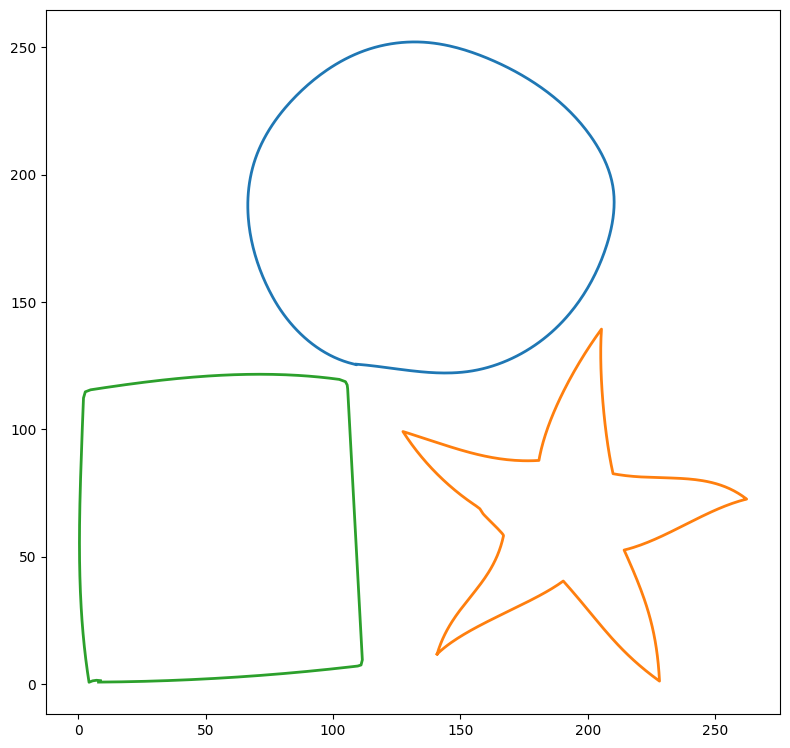

In [121]:
fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
for i in range(size):
    ax.plot (XY[i][:, 0], XY[i][:, 1], linewidth =2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [122]:
len(XY)

3

In [123]:
XY[0][0]
XY[0][len(XY[0])-1]

len(XY[0])

419

In [124]:
start_points = []
end_points = []

for i in range(size):
    a = XY[i][0]
    b = XY[i][len(XY[i])-1]
    start_points.append(a);
    end_points.append(b);

In [125]:
curve_num = {}
for i in range(2*size):
    curve_num[i] = i//2

In [126]:
partner = {}
for i in range(0,2*size,2):
    partner[i] = i+1
for i in range(1,2*size,2):
    partner[i] = i-1

In [127]:
umap = {}
for i in range(size):
    umap[2*i] = start_points[i]
    umap[2*i +1] = end_points[i]

In [128]:
num_curves = size

In [129]:
num_curves = size

adjacency_list = [[] for _ in range(2 * num_curves)]  # 20 nodes for 10 curves

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Build the adjacency list
for i in range(num_curves):

    adjacency_list[2 * i].append((2 * i + 1, i))
    adjacency_list[2 * i + 1].append((2 * i, i))

    for j in range(num_curves):
        if i != j:

            if euclidean_distance(start_points[i], start_points[j]) < 5:
                adjacency_list[2 * i].append((2 * j, j))
            if euclidean_distance(start_points[i], end_points[j]) < 5:
                adjacency_list[2 * i].append((2 * j + 1, j))

            if euclidean_distance(end_points[i], start_points[j]) < 5:
                adjacency_list[2 * i + 1].append((2 * j, j))
            if euclidean_distance(end_points[i], end_points[j]) < 5:
                adjacency_list[2 * i + 1].append((2 * j + 1, j))

In [130]:
def dfs(node, start_node, visited, path, adj_list, partner, unique_cycles):

    path.append(node)
    visited.add(node)

    for neighbor, curve_number in adj_list[node]:

        if len(path) ==2 and partner[path[0]] == path[1] and euclidean_distance(umap[path[0]], umap[path[1]]) < 5:
            curve_path =[]
            curve_path.append(curve_num[path[0]])
            cycle_representation = frozenset(curve_path)
            if cycle_representation not in unique_cycles and len(cycle_representation) > 0:
                unique_cycles[cycle_representation] = list(path) + [start_node]

        if neighbor == start_node and len(path) > 2:

            curve_path = []
            for i in range(len(path)-1):
                cur_node = path[i]
                next_node = path[i + 1]
                if partner[cur_node] == next_node:
                    curve_path.append(curve_num[cur_node])
            if partner[path[len(path)-1]] == neighbor:
                    curve_path.append(curve_num[neighbor])

            cycle_representation = frozenset(curve_path)
            if cycle_representation not in unique_cycles and len(cycle_representation) > 0:
                unique_cycles[cycle_representation] = list(path) + [start_node]

        elif neighbor not in visited:
            dfs(neighbor, start_node, visited, path, adj_list, partner, unique_cycles)

    path.pop()
    visited.remove(node)

def find_closed_curves(adj_list, num_nodes):
    unique_cycles = {}

    for start_node in range(num_nodes):

        visited = set()
        dfs(start_node, start_node, visited, [], adj_list, partner, unique_cycles)


    return unique_cycles

# Number of nodes
num_nodes = len(adjacency_list)

# Find all closed curves
closed_curves = find_closed_curves(adjacency_list, num_nodes)


In [131]:
closed_curves

{frozenset({0}): [0, 1, 0],
 frozenset({1}): [2, 3, 2],
 frozenset({2}): [4, 5, 4]}

In [132]:
type(closed_curves)

dict

In [133]:
len(closed_curves)

3

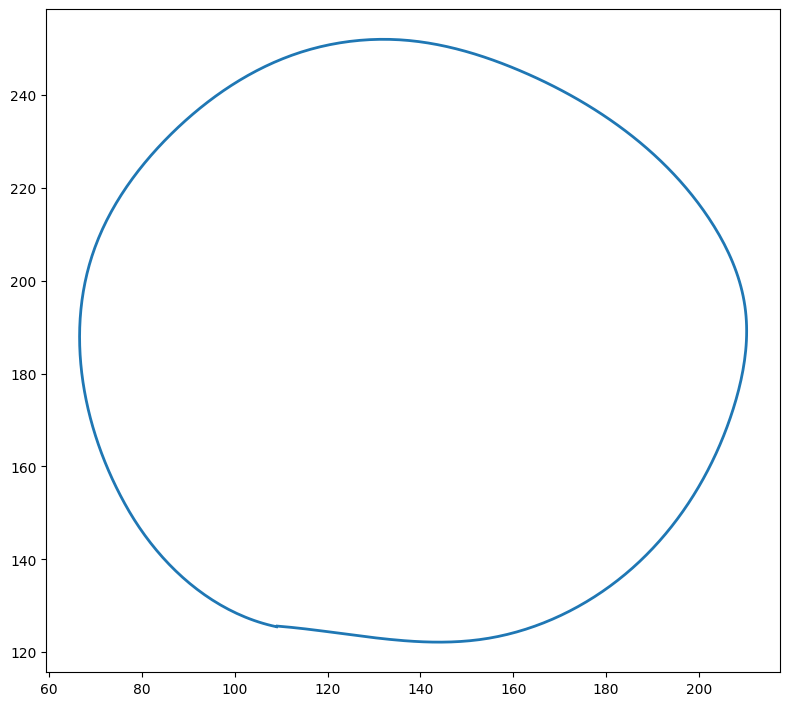

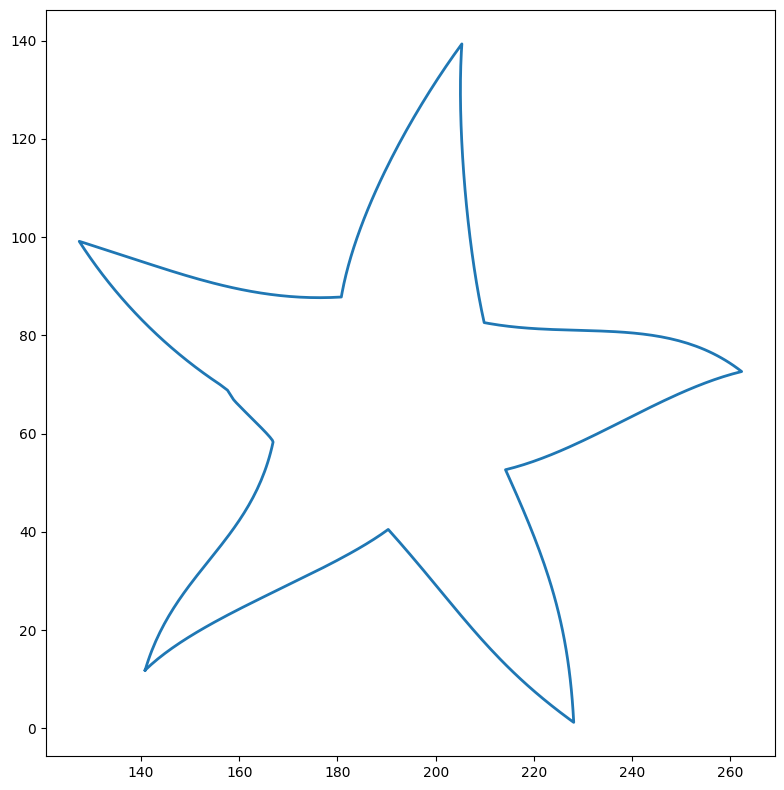

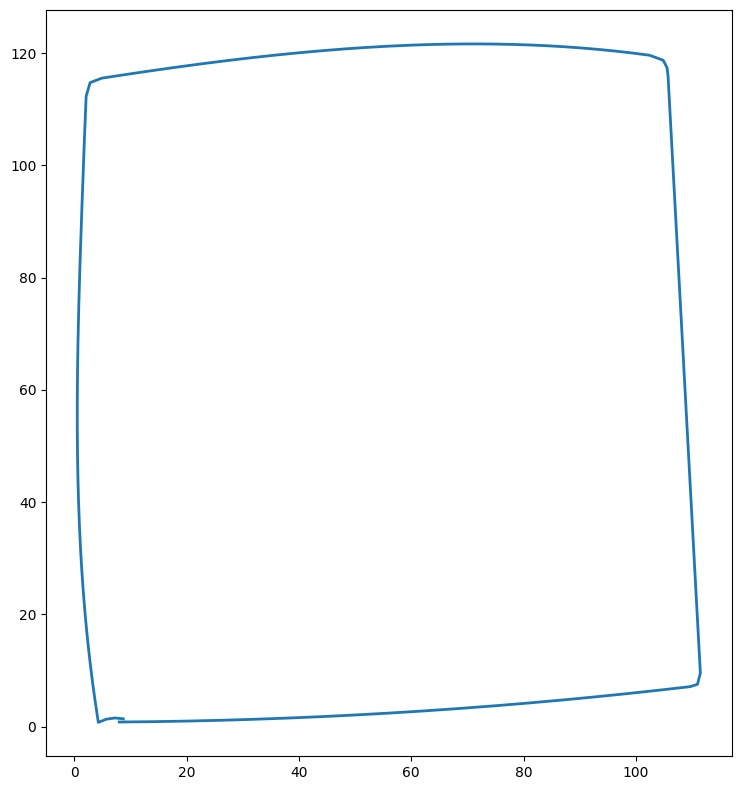

In [134]:
# for i, (curve_set, path) in enumerate(closed_curves.items()):
#     fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
#     for el in curve_set:
#         ax.plot (XY[el][:, 0], XY[el][:, 1], linewidth =2)
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.show()

# Initialize an empty list to store the closed shapes












# closed_shapes = []

# for i, (curve_set, path) in enumerate(closed_curves.items()):
#     fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))

#     # Initialize a list to store the current curve's points
#     current_shape = []

#     for el in curve_set:
#         x_values = XY[el][:, 0]
#         y_values = XY[el][:, 1]

#         # Store the current curve's x and y coordinates
#         current_shape.append(np.column_stack((x_values, y_values)))

#         ax.plot(x_values, y_values, linewidth=2)

#     # Append the current shape to the closed_shapes list
#     closed_shapes.append(current_shape)

#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.show()

# # closed_shapes now contains all the closed shapes as arrays of points









# Initialize an empty list to store the closed shapes
closed_shapes = []

for i, (curve_set, path) in enumerate(closed_curves.items()):
    # Initialize a list to store the current shape's path indices
    current_shape_paths = []

    for el in curve_set:
        # Store the path index or identifier of the current curve
        current_shape_paths.append(str(el))  # Convert index to string for easier concatenation

    # Create a string representing the combination of paths for the current shape
    shape_combo = ','.join(current_shape_paths)

    # Append the path combination to the closed_shapes list
    closed_shapes.append(shape_combo)

    # Optional: If you want to visualize the shapes, uncomment the following lines
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for el in curve_set:
        x_values = XY[el][:, 0]
        y_values = XY[el][:, 1]
        ax.plot(x_values, y_values, linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# closed_shapes now contains all the closed shapes as combinations of path indices



In [135]:
import numpy as np
import cv2
from scipy.spatial import ConvexHull

def get_points_from_paths(paths, XY):
    """ Extract points from a list of path indices. """
    x = []
    y = []
    for path in paths:
        x.extend(XY[path][:, 0])
        y.extend(XY[path][:, 1])
    return np.array(x), np.array(y)

def is_circle(x, y, tolerance=0.2):
    img = np.zeros((500, 500), dtype=np.uint8)
    points = np.vstack((x, y)).astype(np.int32).T
    cv2.polylines(img, [points], isClosed=True, color=255, thickness=2)

    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x_center, y_center, radius) in circles:
            distances = np.sqrt((x - x_center) ** 2 + (y - y_center) ** 2)
            mean_distance = np.mean(distances)
            return np.all(np.abs(distances - mean_distance) / mean_distance < tolerance)
    return False

def is_ellipse(x, y, tolerance=0.1):
    points = np.vstack((x, y)).T
    if len(points) < 5:
        return False

    try:
        ellipse = cv2.fitEllipse(points)
    except cv2.error:
        return False

    (xc, yc), (major_axis, minor_axis), angle = ellipse
    aspect_ratio = major_axis / minor_axis

    if np.abs(aspect_ratio - 1) <= tolerance:
        return False

    return True

def is_square(x, y, tolerance=0.1):
    points = np.vstack((x, y)).astype(np.int32).T
    if len(points) < 4:
        return False

    img = np.zeros((500, 500), dtype=np.uint8)
    cv2.polylines(img, [points], isClosed=True, color=255, thickness=2)

    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return False

    contour = contours[0]
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    num_sides = len(approx)
    if num_sides != 4:
        return False

    edge_lengths = np.sqrt(np.sum(np.diff(np.vstack([approx.squeeze(), approx.squeeze()[0]]), axis=0) ** 2, axis=1))

    return np.all(np.abs(edge_lengths - edge_lengths[0]) / edge_lengths[0] < tolerance)

def is_rectangle(x, y, tolerance=0.1):
    points = np.vstack((x, y)).astype(np.int32).T
    if len(points) < 4:
        return False

    img = np.zeros((500, 500), dtype=np.uint8)
    cv2.polylines(img, [points], isClosed=True, color=255, thickness=2)

    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return False

    contour = contours[0]
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    num_sides = len(approx)
    if num_sides != 4:
        return False

    points = np.squeeze(approx)
    edge_lengths = np.sqrt(np.sum(np.diff(points, axis=0, append=[points[0]]) ** 2, axis=1))
    aspect_ratio = np.max(edge_lengths) / np.min(edge_lengths)

    return aspect_ratio < 2.0

def is_regular_polygon(x, y, tolerance=0.05):
    points = np.vstack((x, y)).T
    hull = ConvexHull(points)
    if len(hull.vertices) < 5:
        return False
    hull_points = points[hull.vertices]
    edge_lengths = np.sqrt(np.sum(np.diff(hull_points, axis=0, append=[hull_points[0]]) ** 2, axis=1))
    mean_edge_length = np.mean(edge_lengths)
    return np.all(np.abs(edge_lengths - mean_edge_length) / mean_edge_length < tolerance)

def is_star(x, y, tolerance=0.2):
    points = np.array(list(zip(x, y)), dtype=np.int32)

    if len(points) < 10:
        return False

    contour = points.reshape((-1, 1, 2))
    epsilon = 0.05 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    num_sides = len(approx)
    if num_sides < 10:
        return False

    return True

# Example usage
for shape_combo in closed_shapes:
    paths = list(map(int, shape_combo.split(',')))  # Convert path indices from string
    x, y = get_points_from_paths(paths, XY)

    if is_circle(x, y):
        print(f"Shape {shape_combo} is a Circle.")
    elif is_ellipse(x, y):
        print(f"Shape {shape_combo} is an Ellipse.")
    elif is_square(x, y):
        print(f"Shape {shape_combo} is a Square.")
    elif is_rectangle(x, y):
        print(f"Shape {shape_combo} is a Rectangle.")
    elif is_regular_polygon(x, y):
        print(f"Shape {shape_combo} is a Regular Polygon.")
    elif is_star(x, y):
        print(f"Shape {shape_combo} is a Star.")
    else:
        print(f"Shape {shape_combo} is not recognized.")


Shape 0 is a Circle.
Shape 1 is a Star.
Shape 2 is a Square.


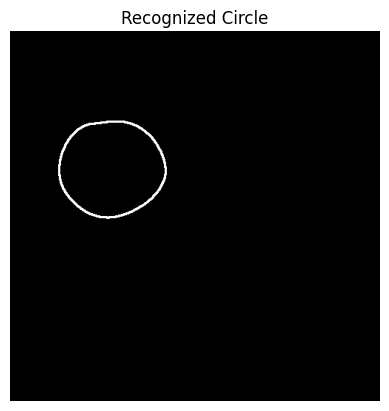

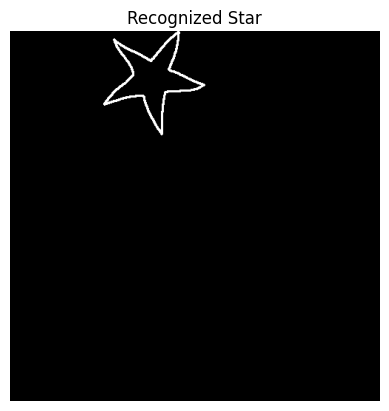

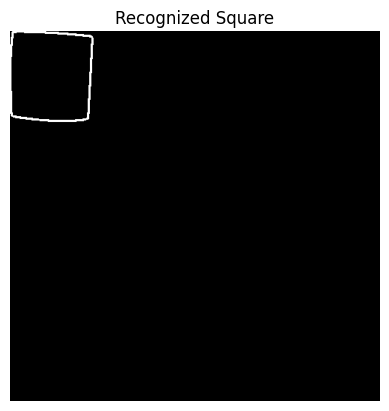

In [136]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def get_points_from_paths(paths, XY):
    """ Extract points from a list of path indices. """
    x = []
    y = []
    for path in paths:
        x.extend(XY[path][:, 0])
        y.extend(XY[path][:, 1])
    return np.array(x), np.array(y)

def is_circle(x, y, tolerance=0.2):
    img = np.zeros((500, 500), dtype=np.uint8)
    points = np.vstack((x, y)).astype(np.int32).T
    cv2.polylines(img, [points], isClosed=True, color=255, thickness=2)

    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x_center, y_center, radius) in circles:
            distances = np.sqrt((x - x_center) ** 2 + (y - y_center) ** 2)
            mean_distance = np.mean(distances)
            return np.all(np.abs(distances - mean_distance) / mean_distance < tolerance)
    return False

def is_ellipse(x, y, tolerance=0.1):
    points = np.vstack((x, y)).T
    if len(points) < 5:
        return False

    try:
        ellipse = cv2.fitEllipse(points)
    except cv2.error:
        return False

    (xc, yc), (major_axis, minor_axis), angle = ellipse
    aspect_ratio = major_axis / minor_axis

    if np.abs(aspect_ratio - 1) <= tolerance:
        return False

    return True

def is_square(x, y, tolerance=0.1):
    points = np.vstack((x, y)).astype(np.int32).T
    if len(points) < 4:
        return False

    img = np.zeros((500, 500), dtype=np.uint8)
    cv2.polylines(img, [points], isClosed=True, color=255, thickness=2)

    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return False

    contour = contours[0]
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    num_sides = len(approx)
    if num_sides != 4:
        return False

    edge_lengths = np.sqrt(np.sum(np.diff(np.vstack([approx.squeeze(), approx.squeeze()[0]]), axis=0) ** 2, axis=1))

    return np.all(np.abs(edge_lengths - edge_lengths[0]) / edge_lengths[0] < tolerance)

def is_rectangle(x, y, tolerance=0.1):
    points = np.vstack((x, y)).astype(np.int32).T
    if len(points) < 4:
        return False

    img = np.zeros((500, 500), dtype=np.uint8)
    cv2.polylines(img, [points], isClosed=True, color=255, thickness=2)

    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return False

    contour = contours[0]
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    num_sides = len(approx)
    if num_sides != 4:
        return False

    points = np.squeeze(approx)
    edge_lengths = np.sqrt(np.sum(np.diff(points, axis=0, append=[points[0]]) ** 2, axis=1))
    aspect_ratio = np.max(edge_lengths) / np.min(edge_lengths)

    return aspect_ratio < 2.0

def is_regular_polygon(x, y, tolerance=0.05):
    points = np.vstack((x, y)).T
    hull = ConvexHull(points)
    if len(hull.vertices) < 5:
        return False
    hull_points = points[hull.vertices]
    edge_lengths = np.sqrt(np.sum(np.diff(hull_points, axis=0, append=[hull_points[0]]) ** 2, axis=1))
    mean_edge_length = np.mean(edge_lengths)
    return np.all(np.abs(edge_lengths - mean_edge_length) / mean_edge_length < tolerance)

def is_star(x, y, tolerance=0.2):
    points = np.array(list(zip(x, y)), dtype=np.int32)

    if len(points) < 10:
        return False

    contour = points.reshape((-1, 1, 2))
    epsilon = 0.05 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    num_sides = len(approx)
    if num_sides < 10:
        return False

    return True

def visualize_and_store_shape(x, y, shape_name, file_index):
    """ Visualize and save the shape image if recognized. """
    img = np.zeros((500, 500), dtype=np.uint8)
    points = np.vstack((x, y)).astype(np.int32).T
    cv2.polylines(img, [points], isClosed=True, color=255, thickness=2)

    # Save the image
    filename = f"shape_{shape_name}_{file_index}.png"
    cv2.imwrite(filename, img)

    # Show the image
    plt.imshow(img, cmap='gray')
    plt.title(f"Recognized {shape_name}")
    plt.axis('off')
    plt.show()

# Example usage
file_index = 0
for shape_combo in closed_shapes:
    paths = list(map(int, shape_combo.split(',')))  # Convert path indices from string
    x, y = get_points_from_paths(paths, XY)

    if is_circle(x, y):
        visualize_and_store_shape(x, y, "Circle", file_index)
        file_index += 1
    elif is_ellipse(x, y):
        visualize_and_store_shape(x, y, "Ellipse", file_index)
        file_index += 1
    elif is_square(x, y):
        visualize_and_store_shape(x, y, "Square", file_index)
        file_index += 1
    elif is_rectangle(x, y):
        visualize_and_store_shape(x, y, "Rectangle", file_index)
        file_index += 1
    elif is_regular_polygon(x, y):
        visualize_and_store_shape(x, y, "RegularPolygon", file_index)
        file_index += 1
    elif is_star(x, y):
        visualize_and_store_shape(x, y, "Star", file_index)
        file_index += 1
    else:
        print(f"Shape {shape_combo} is not recognized.")


In [137]:
import numpy as np

def reconstruct_single_curve(node_sequence, umap, XY, partner):
    curve_points = []
    i = 0

    while i < len(node_sequence) - 1:
        cur_node = node_sequence[i]
        next_node = node_sequence[i + 1]

        # Check if next node is the partner of the current node
        if partner[cur_node] != next_node:
            # Directly add the point if it's a partner
            i += 1
        else:
            # Find a curve in XY that starts or ends with the points corresponding to cur_node and next_node
            start_point = umap[cur_node]
            end_point = umap[next_node]
            found_curve = False

            for curve in XY:
                curve_start = curve[0]
                curve_end = curve[-1]

                if (np.array_equal(curve_start, start_point) and np.array_equal(curve_end, end_point)) or (np.array_equal(curve_start, end_point) and np.array_equal(curve_end, start_point)):
                    # If start_point and end_point match, add points to the curve
                    if np.array_equal(curve_start, start_point):
                        curve_points.extend(curve)
                    else:
                        curve_points.extend(curve[::-1])

                    found_curve = True
                    break

            if not found_curve:
                raise ValueError("Curve with the specified start and end points not found in XY.")

            # Move ahead to the next to next node
            i += 2

    return np.array(curve_points)

# Example usage
# node_sequence: the sequence of nodes in the closed curve
# umap: dictionary mapping node indices to points
# XY: list of curves where each curve is a sequence of points
# partner: dictionary mapping each node to its partner node

